# Week 1 Task Heart Disease Prediction 

# Step 1: Load Libraries

In [20]:
# Import required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load & Explore Dataset

In [8]:
df = pd.read_csv('Downloads/archive/heart_cleveland_upload.csv')

df.head()



age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

 # Step 3: Data Cleaning


##   Missing Values

In [9]:
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Remove Duplicates

In [10]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Duplicate rows: 0


# Step 4: Encode Categorical Variables

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


age: [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex: [1 0]
cp: [0 1 2 3]
trestbps: [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol: [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
fbs: [

# Step 5: Scale Features

In [13]:
X = df.drop('condition', axis=1)
y = df['condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.600302  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199   
1  1.600302 -1.446980 -2.240629  0.468418 -0.160859 -0.411450 -1.003419   
2  1.268242 -1.446980 -2.240629  1.032342 -0.411292 -0.411450 -1.003419   
3  1.157555  0.691095 -2.240629  0.355633  0.667499  2.430427  1.010199   
4  1.046868  0.691095 -2.240629 -1.223355 -0.700254 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.812095 -0.696419 -0.820813  0.643781  0.344824 -0.874292  
1  0.061157 -0.696419  0.639470 -0.976583  1.411625 -0.874292  
2 -1.554358 -0.696419  1.326662  2.264145 -0.721976 -0.874292  
3  1.065396 -0.696419  0.295874  0.643781  0.344824 -0.874292  
4 -0.244481  1.435916  0.639470  0.643781 -0.721976 -0.874292

# Step 6: EDA

 ## Target Distribution

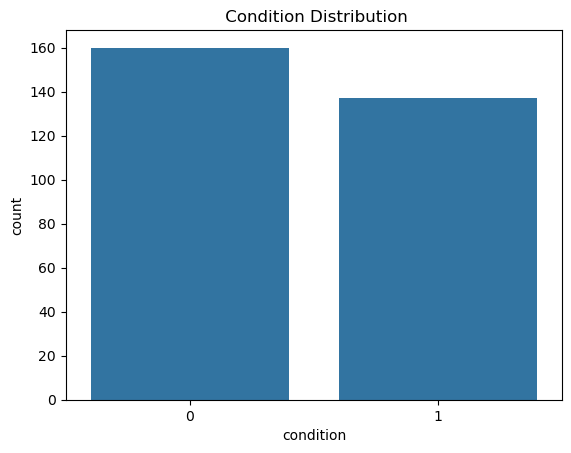

In [41]:
sns.countplot(x='condition', data=df)
plt.title(' Condition Distribution')
plt.show()


## Correlation Heatmap

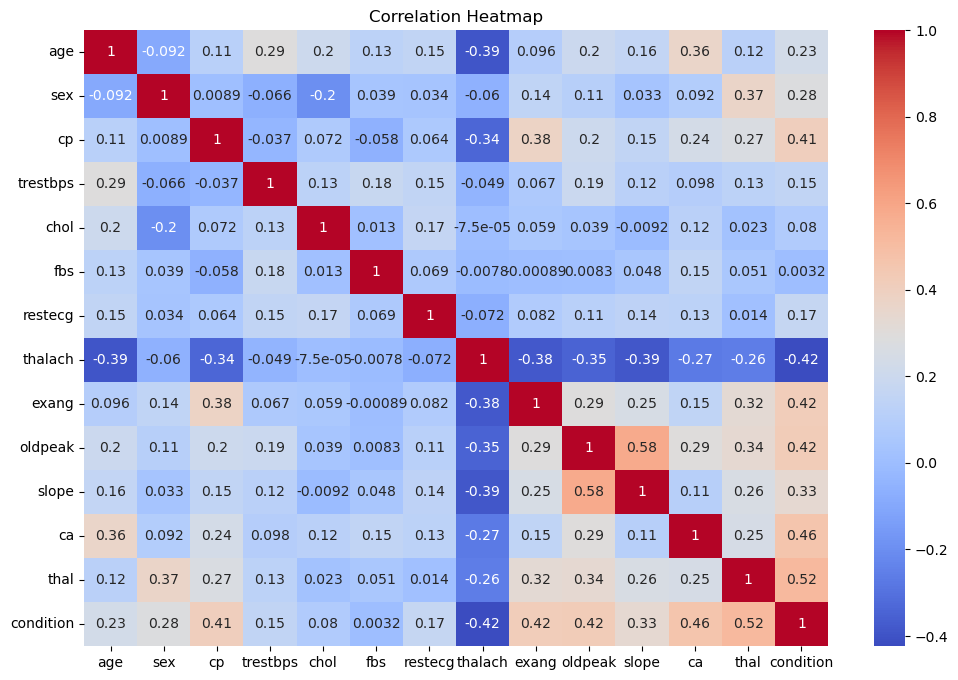

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Box Plot

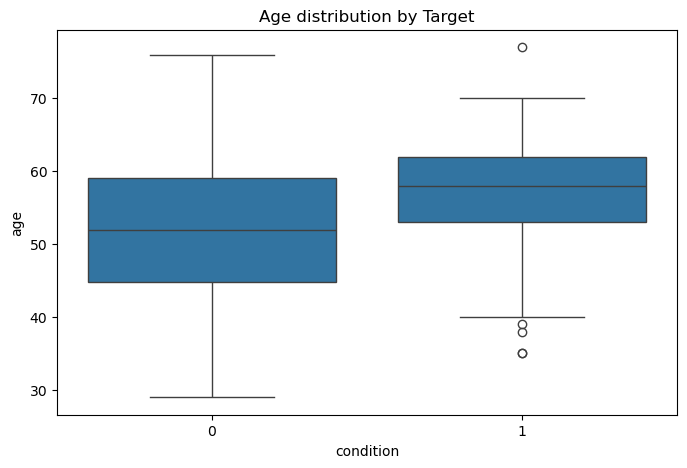

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='age', data=df)
plt.title('Age distribution by Target')
plt.show()


# Step 7: Feature Selection

In [31]:
print(X_scaled.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [32]:
X = df.drop(columns=['condition'])  # keep all features except target

# Optionally drop irrelevant features
X = X.drop(columns=['chol', 'fbs'])

# then scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [33]:
X = df.drop(columns=['condition'])
y = df['condition']

X = X.drop(columns=['chol', 'fbs'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [34]:
print(X_scaled.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# Step 8: Model Building & Evaluation


## Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (237, 11), Test shape: (60, 11)


## Model 1: Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        32
           1       0.70      0.68      0.69        28

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



### Confusion matrix:

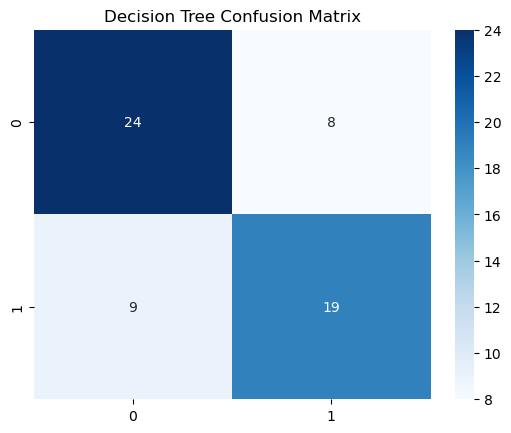

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


## Model 2: Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.67      0.79      0.72        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



### Confusion matrix:

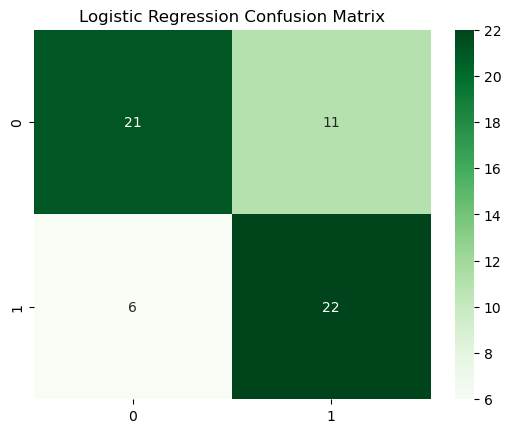

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# Step 9: Compare Models

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_lr)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_lr)
    ]
})

results


Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.716667   0.703704  0.678571  0.690909
1  Logistic Regression  0.716667   0.666667  0.785714  0.721311

# Step 10: Interpretation
Logistic Regression outperformed Decision Tree on Accuracy, Precision, Recall, and F1-Score. Therefore, Logistic Regression is recommended for this problem.

# Step 10: Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [2, 4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate tuned model
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

print("Tuned Decision Tree Performance:")
print(classification_report(y_test, y_pred_best_dt))


Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10}
Best Cross-Validated Accuracy: 0.8141843971631205
Tuned Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        32
           1       0.62      0.54      0.58        28

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.63      0.63      0.63        60



 
###  Conclusion:
- The tuned Decision Tree model improved slightly compared to the default parameters.
- The best parameters improve generalization and help avoid overfitting.
- However, Logistic Regression still performs slightly better overall on this dataset.

I recommend Logistic Regression for deployment, with the tuned Decision Tree as a strong alternative.



In [43]:
import joblib

# Save Logistic Regression model and scaler
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']